# Credit Card Fraud Detection
Dataset Link - https://www.kaggle.com/mlg-ulb/creditcardfraud

- The datasets contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the author cannot provide the original features and more background information about the data. 
- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Exploratory Data Analysis

#### Importing Libraries and Dataset

In [1]:
# Importing required libraries
import pylab
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Importing the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Printing the dimanesions of the dataframe
df.shape

(284807, 31)

#### Checking for Missing/NaN Values

In [4]:
# Printing number of missing/NaN values in each feature
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- We can see that there are no NaN values present in the dataset, so no need to worry about them.

#### Visualizing Independent Features

In [5]:
# Extracting independent features
independent_features = df.columns[:-1]
independent_features = list(independent_features)
print(independent_features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


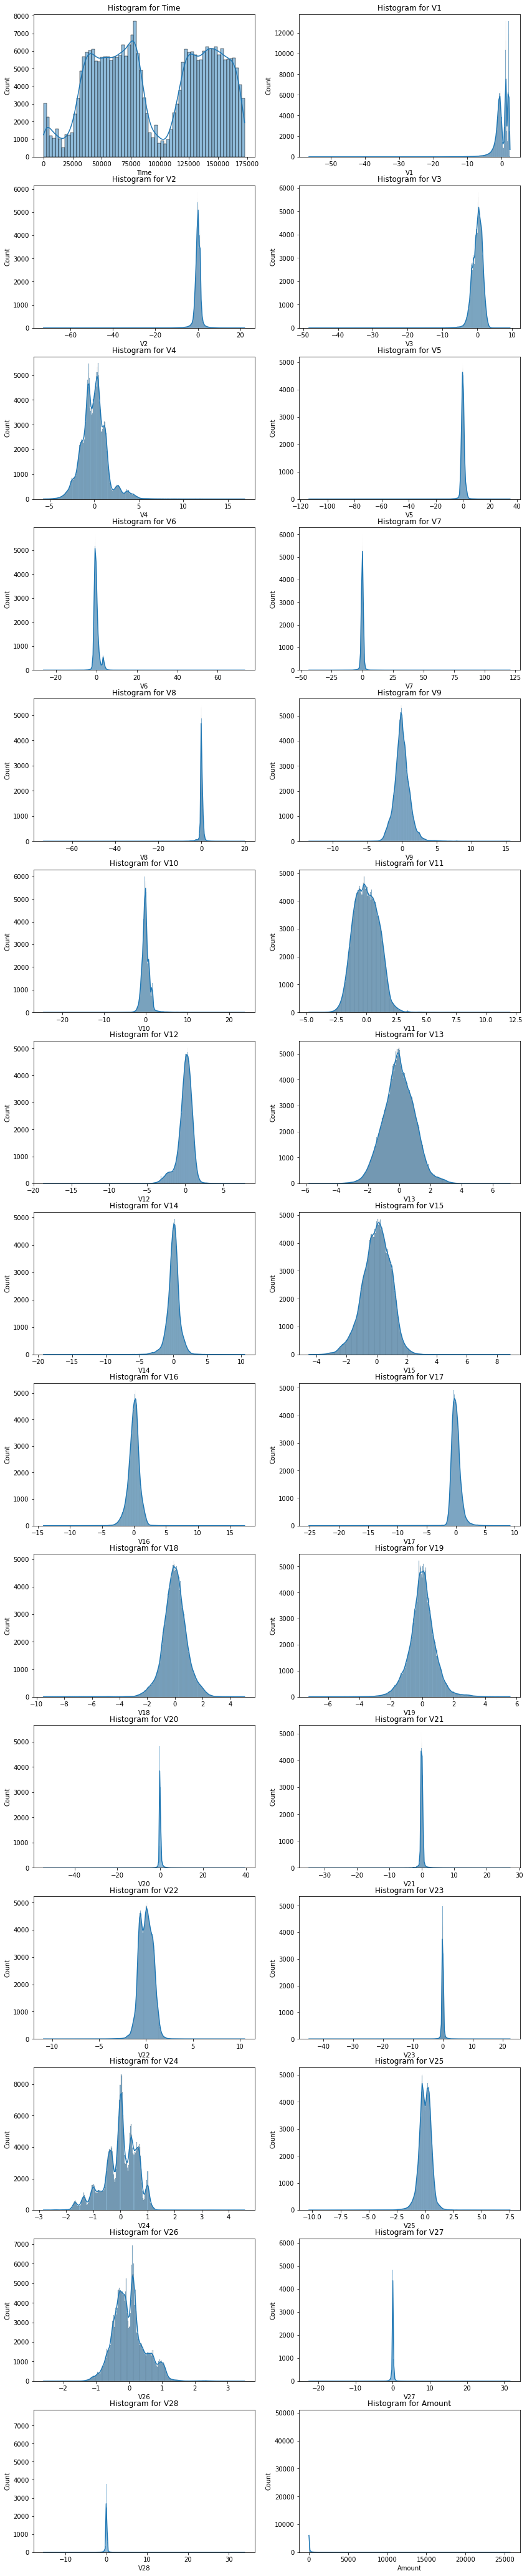

In [6]:
# Plotting histograms for all the independent features with their kernel density estimations
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(7*2, 5*15))

for i, feature in enumerate(independent_features):
    row = i // 2
    col = i % 2
    sns.histplot(x=df[feature], data=df, kde=True, ax=axes[row][col])
    axes[row][col].set_title(f'Histogram for {feature}')

In [7]:
# Defining a function to plot Q-Q plots
def plot_QQ(df, feature):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[feature], kde=True)
    plt.title(f'Histogram for {feature}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(x=df[feature], dist='norm', plot=pylab)
    plt.title(f'Probably Plot for {feature}')
    
    plt.tight_layout()
    plt.show()

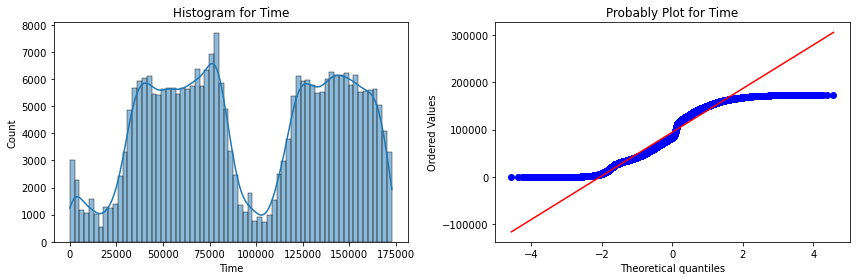

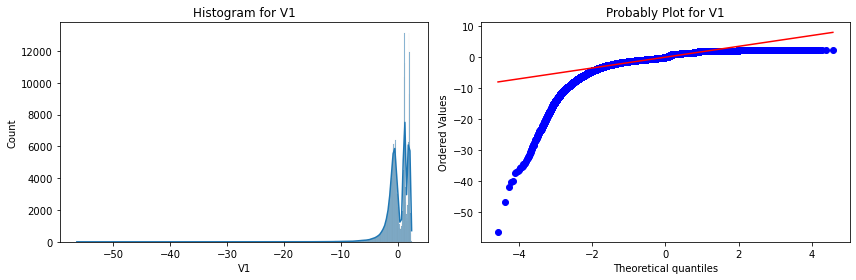

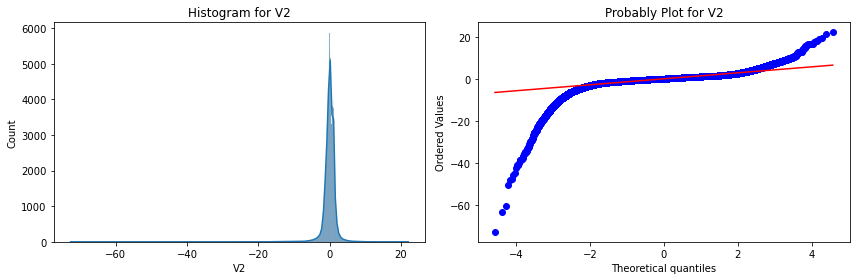

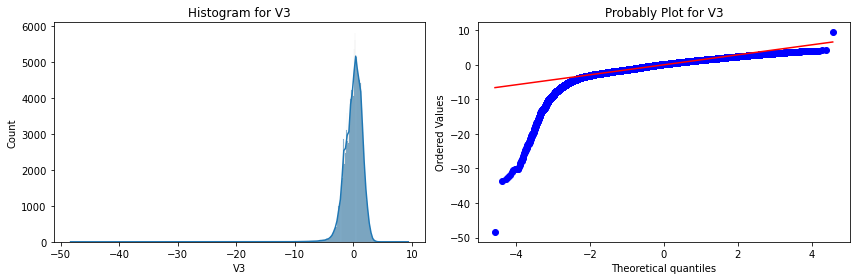

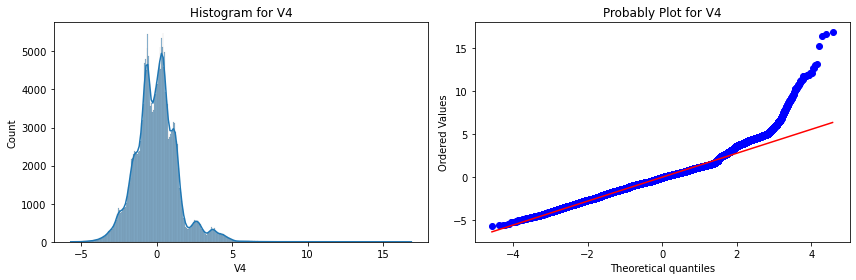

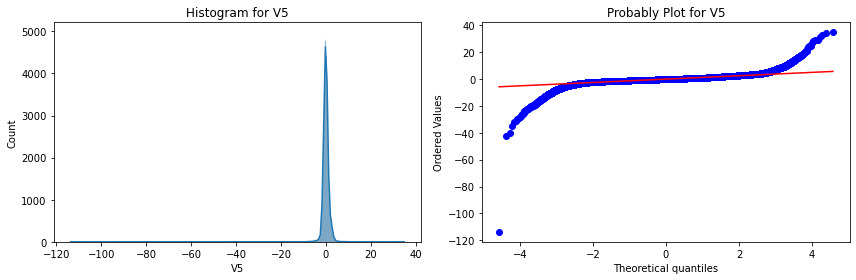

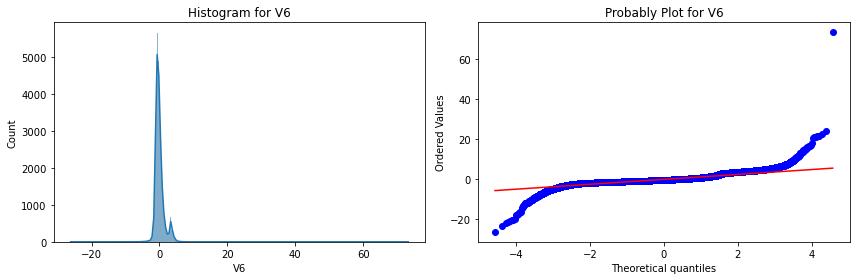

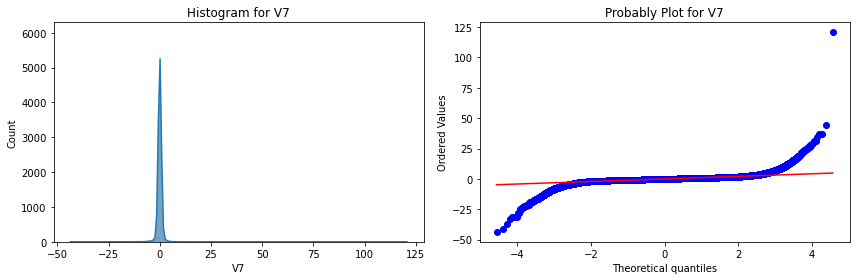

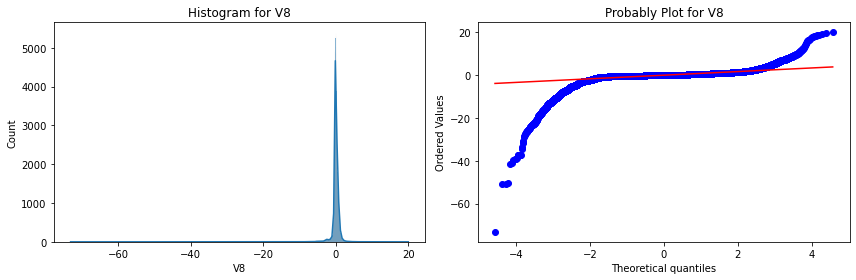

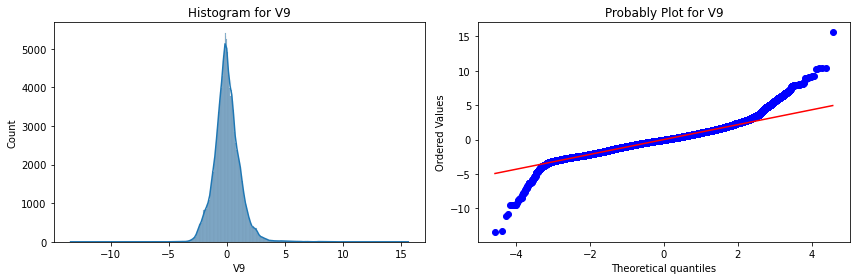

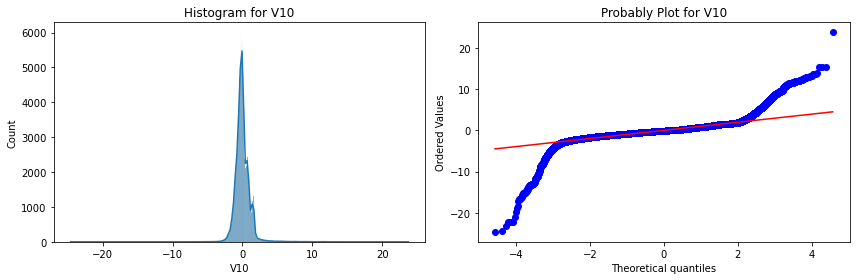

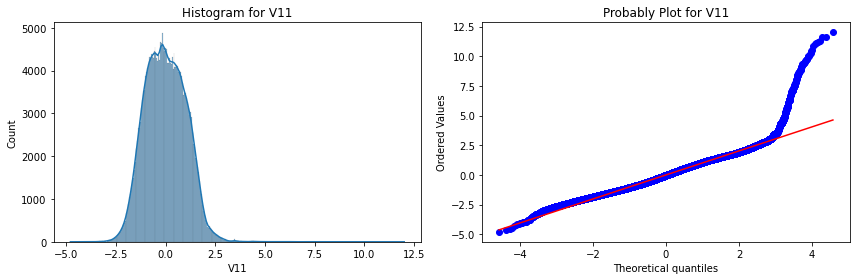

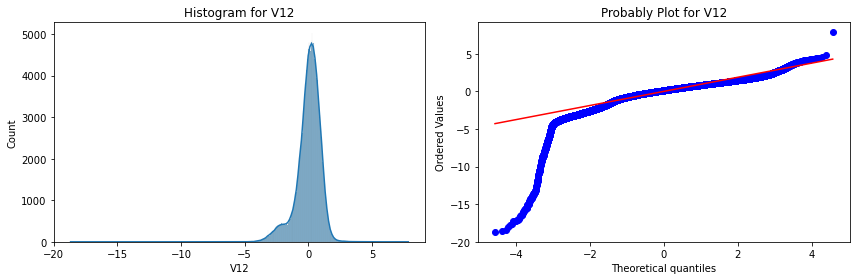

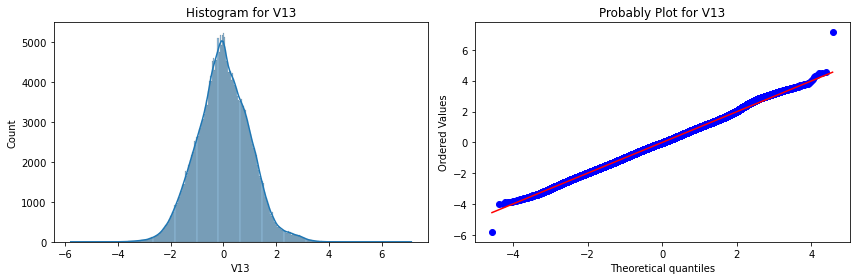

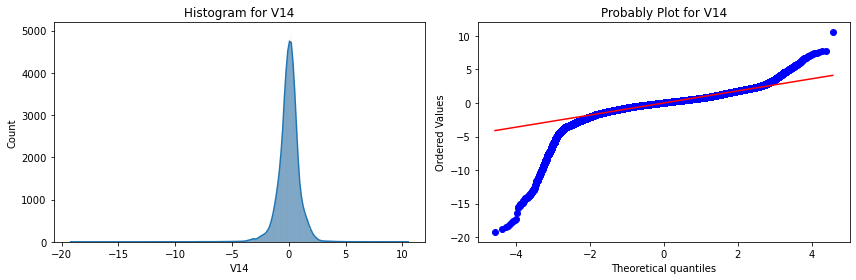

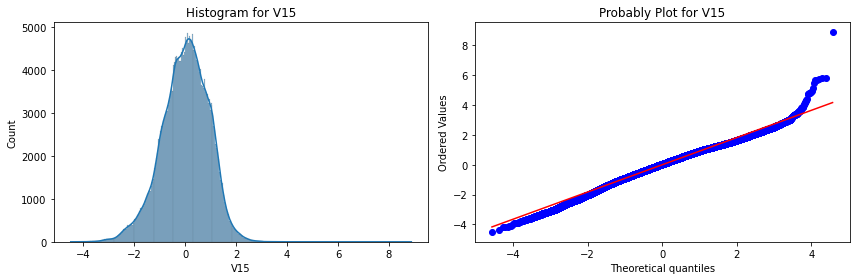

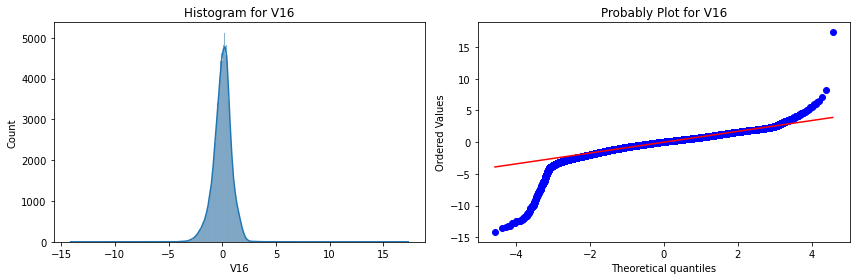

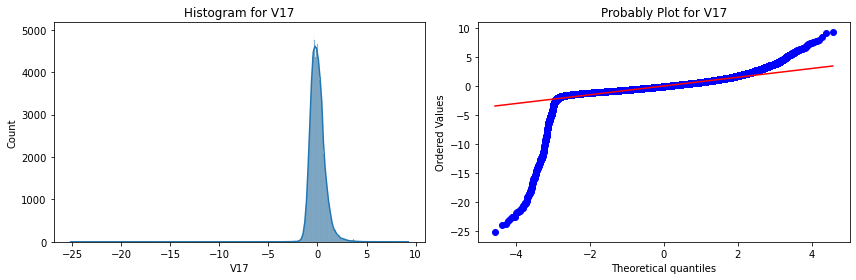

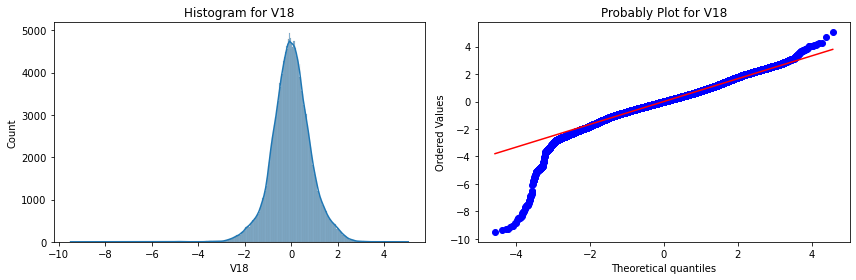

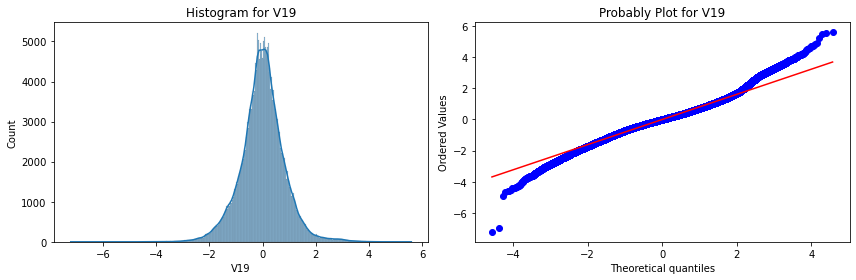

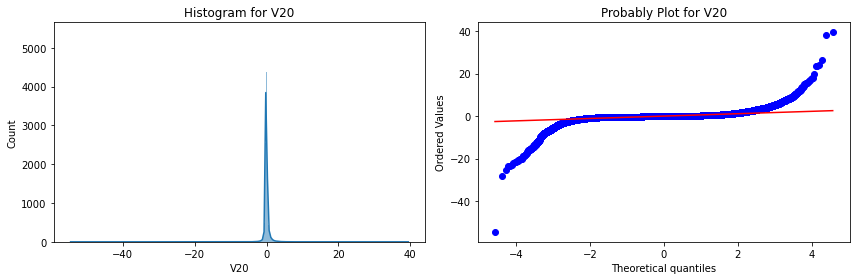

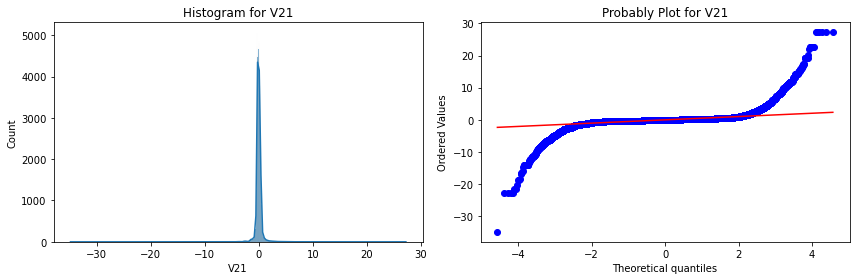

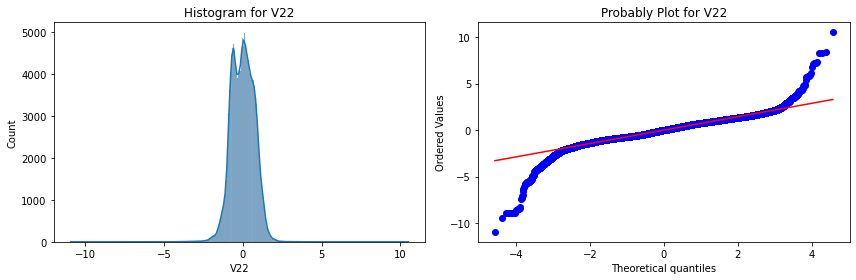

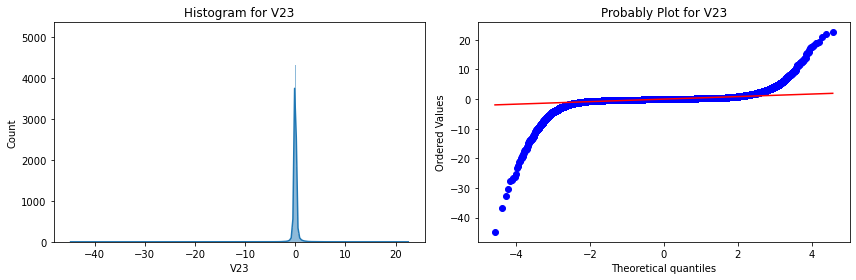

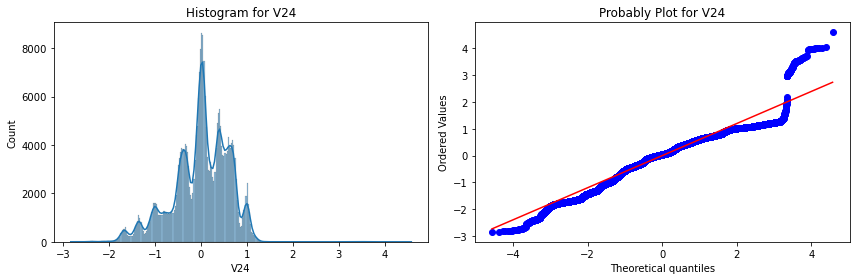

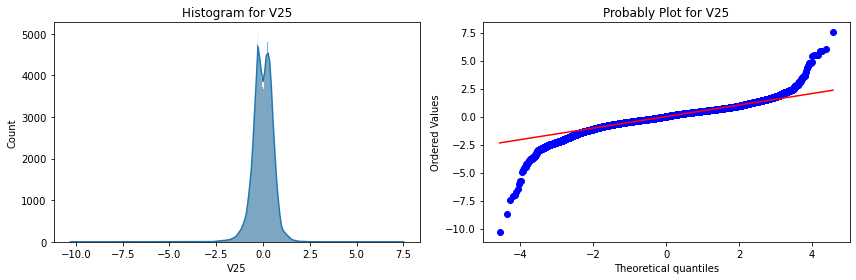

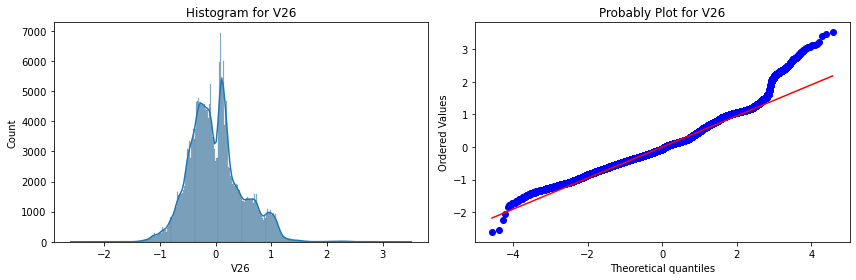

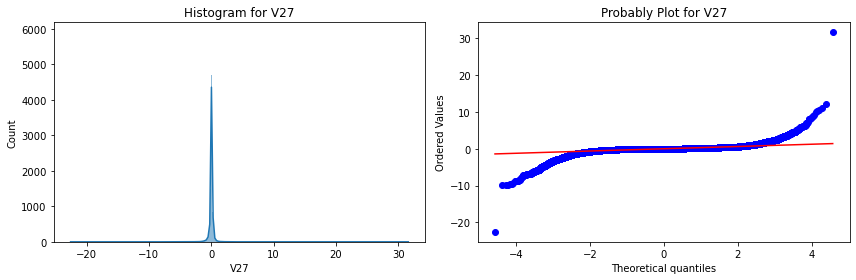

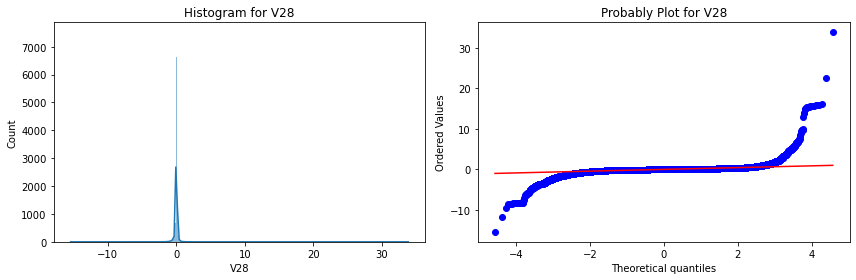

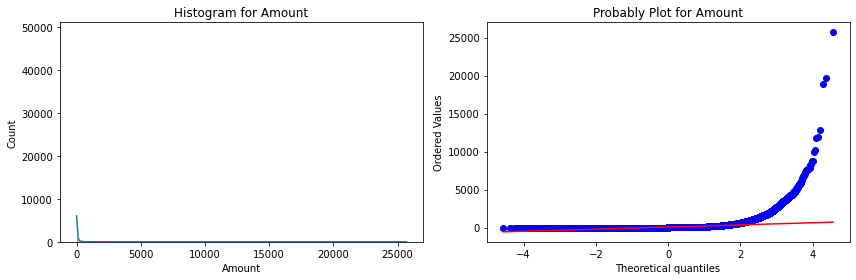

In [8]:
# Plotting Q-Q plots for the independent features
for feature in independent_features:
    plot_QQ(df, feature)

- We can see that most of the features are roughly normally distributed, but they have a lot of outliers.
- We can try to fix this by applying some transformations.

#### Visualizing Dependent Feature

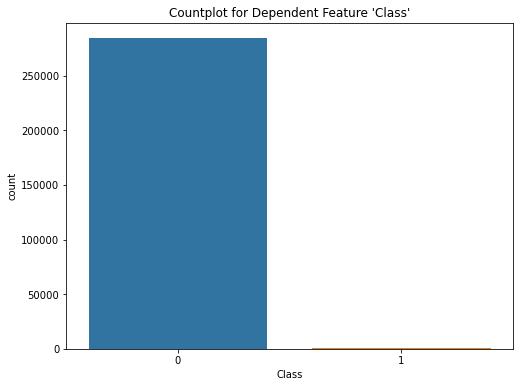

In [9]:
# Plotting countplot of the dependent feature
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Class'])
plt.title('Countplot for Dependent Feature \'Class\'')
plt.show()

In [10]:
# Printing number of records for each class in 'Class'
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- We can see that the dependent feature 'Class' is highly imbalanced, where number of instances of class 0 (genuine or not-fraud transaction) is much much more than that of class 1.
- We would need to apply some kind of feature engineering technique to balance the dependent feature.

#### Visualizing Relationship Between Independent Features and Dependent Feature

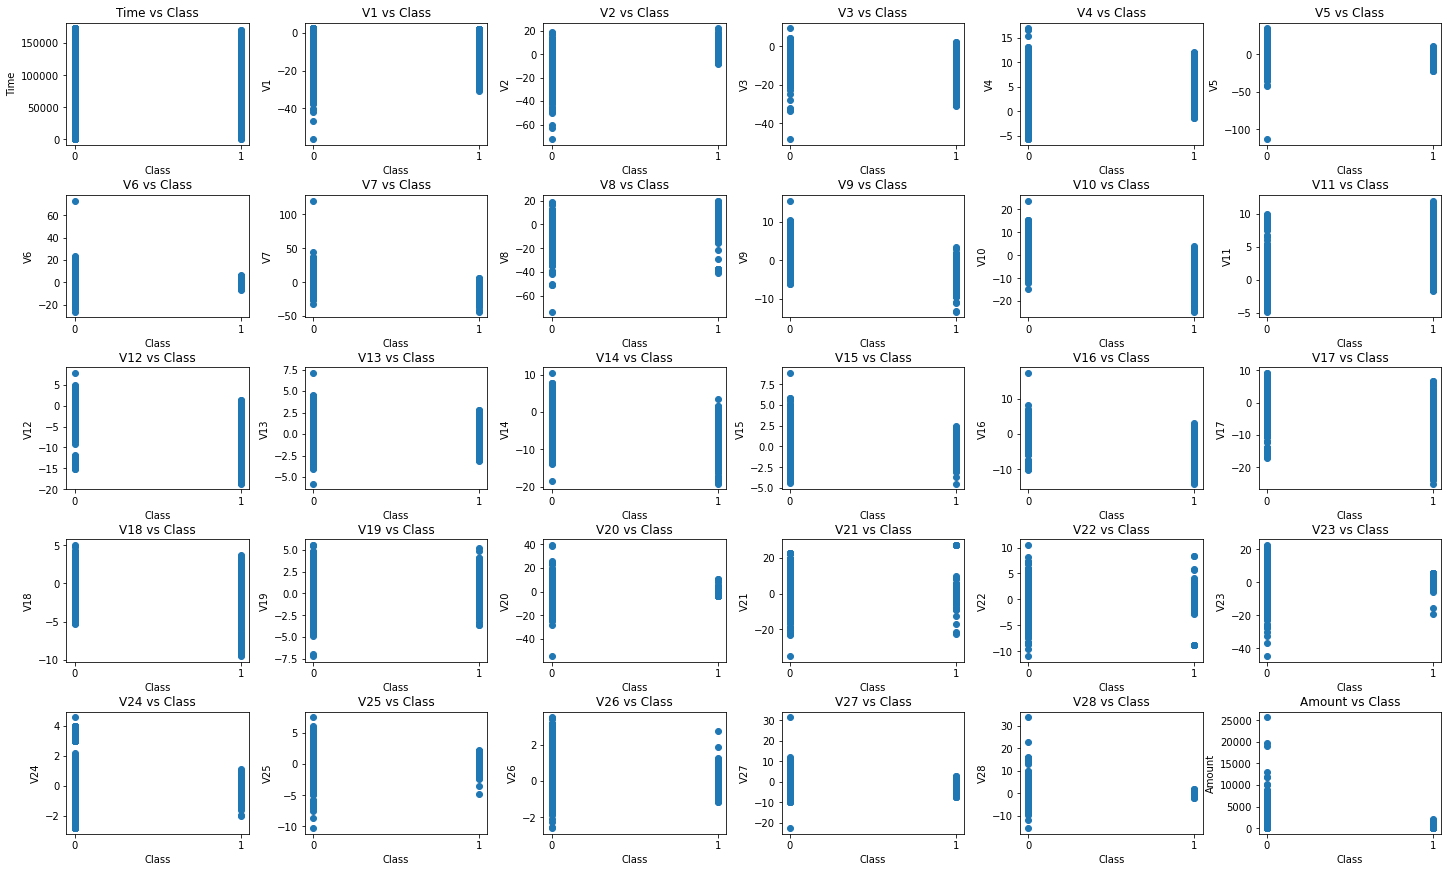

In [11]:
# Plotting a scatterplot for each independent feature against the dependent feature
fig, axes = plt.subplots(5, 6, figsize=(20, 12))

for i, feature in enumerate(independent_features):
    row = i // 6
    col = i % 6
    
    axes[row][col].scatter(x=df['Class'], y=df[feature])
    axes[row][col].set_xticks((0, 1))
    axes[row][col].set_title(f'{feature} vs Class')
    axes[row][col].set_xlabel('Class')
    axes[row][col].set_ylabel(feature)
    
    plt.tight_layout(pad=0.3)

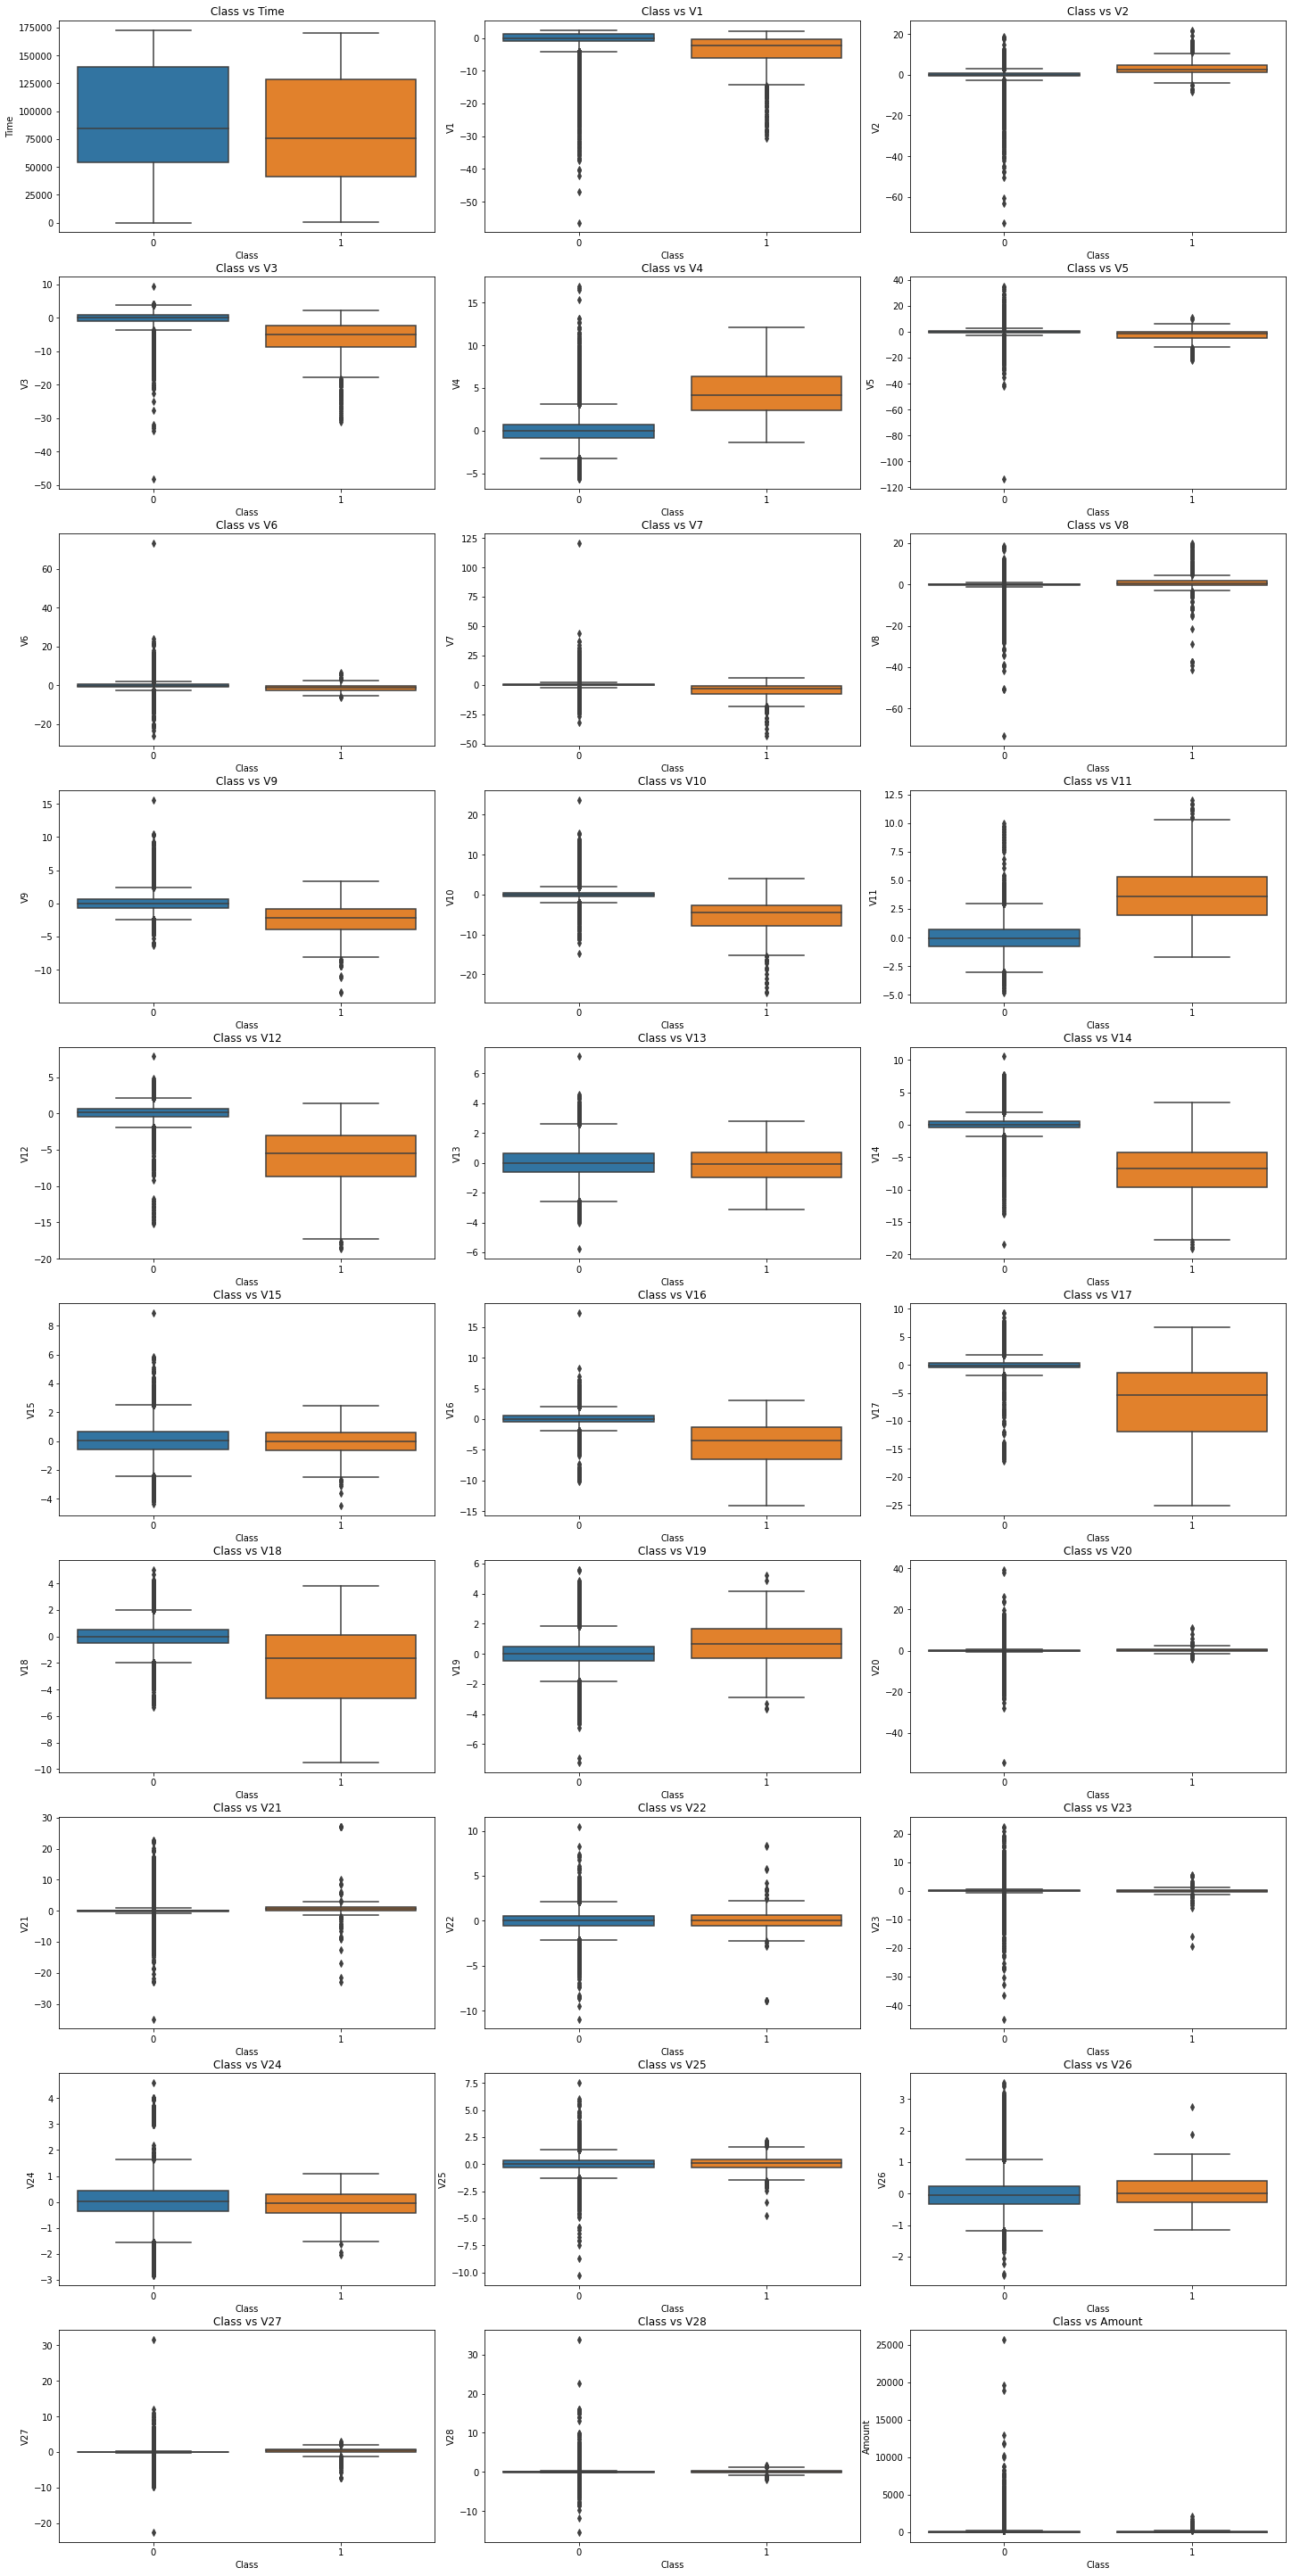

In [12]:
# Plotting a boxplot for each independent feature against the dependent feature
fig, axes = plt.subplots(10, 3, figsize=(20, 40))

for i, feature in enumerate(independent_features):
    row = i // 3
    col = i % 3
    
    sns.boxplot(x=df['Class'], y=df[feature], ax=axes[row][col])
    axes[row][col].set_title(f'Class vs {feature}')
    
    plt.tight_layout(pad=0.3)

#### Plotting Correlation Heatmap

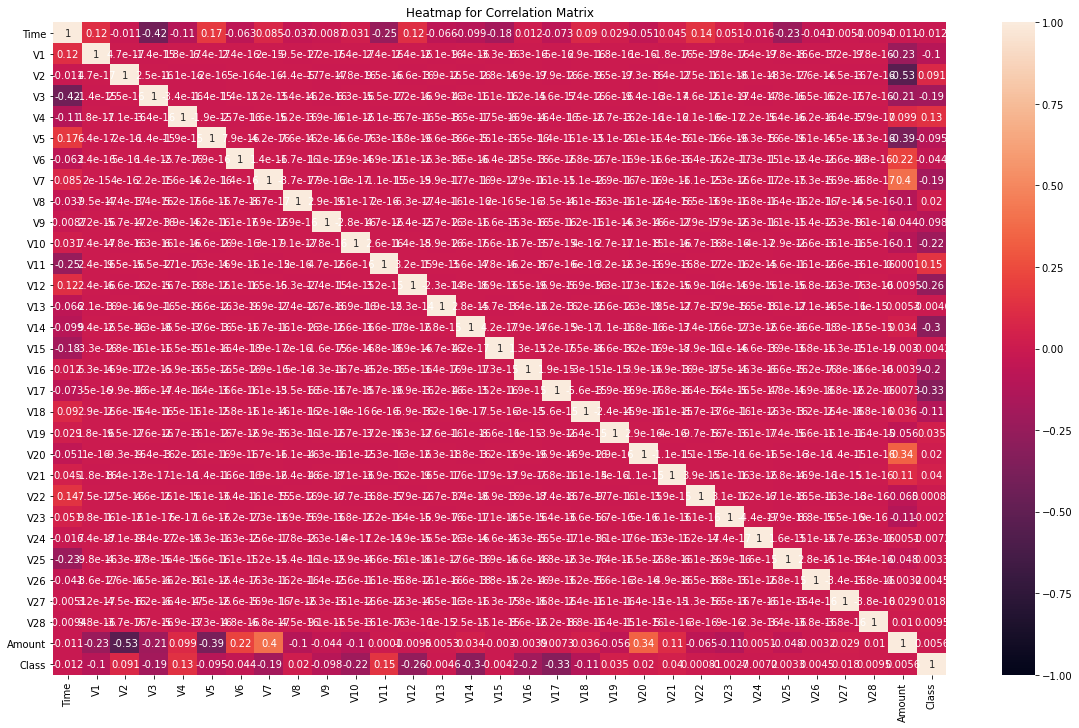

In [13]:
# Plotting correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Heatmap for Correlation Matrix')
plt.show()

- From the correlation heatmap we can clearly see that non of the features have high correlation.

## Feature Selection

#### Splitting the Data into Train and Test Sets

In [14]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[independent_features], df['Class'], test_size=0.2, random_state=0)
print('Dimensions of X_train :', X_train.shape)
print('Dimensions of y_train :', y_train.shape)
print('Dimensions of X_test  :', X_test.shape)
print('Dimensions of y_test  :', y_test.shape)

Dimensions of X_train : (227845, 30)
Dimensions of y_train : (227845,)
Dimensions of X_test  : (56962, 30)
Dimensions of y_test  : (56962,)


#### Feature Importance using Extra Tree Classifier

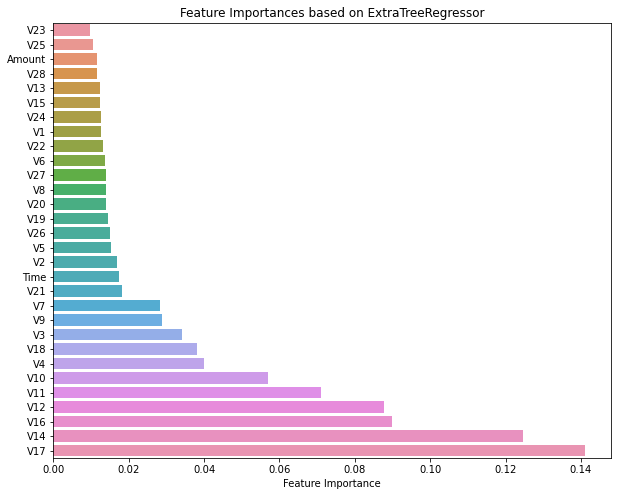

In [15]:
# Training ExtraTreeClassifier model on train data and plotting the feature importances
extra_tree_classifier = ExtraTreesClassifier()
extra_tree_classifier.fit(X_train, y_train)

feature_importances = pd.Series(extra_tree_classifier.feature_importances_, X_train.columns).sort_values()
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, orient='h')
plt.title('Feature Importances based on ExtraTreeRegressor')
plt.xlabel('Feature Importance')
plt.show()

In [16]:
# Extracting the top 10 independent features
features_selected = list(feature_importances.index[-10:])
print('Top 10 Most Important Features are\n\n', features_selected)

Top 10 Most Important Features are

 ['V9', 'V3', 'V18', 'V4', 'V10', 'V11', 'V12', 'V16', 'V14', 'V17']


In [17]:
# Keeping only the selected features
X_train = X_train[features_selected]
X_test = X_test[features_selected]

## Feature Engineering

#### Simultaneous Upsampling and Downsampling using SMOTETomek

In [18]:
# Resampling the imbalanced training set to have a more balanced distribution of the dependent feature 'Class'
print('Number of examples in dependent feature before resampling', Counter(y_train))
sampler = SMOTETomek(random_state=0)
X_train, y_train = sampler.fit_resample(X_train, y_train)
print('Number of examples in dependent feature after resampling', Counter(y_train))

Number of examples in dependent feature before resampling Counter({0: 227454, 1: 391})
Number of examples in dependent feature after resampling Counter({0: 227454, 1: 227454})


## Model Building

#### Logistic Regression Classifier

In [19]:
# Defining hyperparameter values to tune over
grid_params = {
    'C' : 10.0 ** np.arange(-2, 2),
     'penalty' : ['l1', 'l2'],
    'class_weight' : [{0:1, 1:10}, {0:1, 1:100}, {0:1, 1:1000}, {0:1, 1:10000}]
}

In [20]:
# Building a Logistic Regression Classifier model 
logistic_classifier = GridSearchCV(estimator=LogisticRegression(n_jobs=-1), param_grid=grid_params, 
                                   cv=3, scoring='f1_macro', n_jobs=-1)
logistic_classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                         'class_weight': [{0: 1, 1: 10}, {0: 1, 1: 100},
                                          {0: 1, 1: 1000}, {0: 1, 1: 10000}],
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [21]:
# Printing best hyperparamters
print('Best hyperparameters:', logistic_classifier.best_params_)

# Creating final logistic regression model with best hyperparameteres
logistic_classifier = LogisticRegression(C=0.01, class_weight={0:1,1:10}, penalty='l2', n_jobs=-1)
logistic_classifier.fit(X_train, y_train)

Best hyperparameters: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2'}


LogisticRegression(C=0.01, class_weight={0: 1, 1: 10}, n_jobs=-1)

In [22]:
# Making predictions on test data and printing metrics for those predictions
y_pred = logistic_classifier.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix\n\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report\n\n', classification_report(y_test, y_pred))

Accuracy :  0.7785014571117587

Confusion Matrix

 [[44247 12614]
 [    3    98]]

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.78      0.88     56861
           1       0.01      0.97      0.02       101

    accuracy                           0.78     56962
   macro avg       0.50      0.87      0.45     56962
weighted avg       1.00      0.78      0.87     56962



- We can see that the precision, recall and f1-score for class 1 are low.
- The number of false negatives is very high, that is, the model fails to identifies many fraud transactions.
- This means the model is not performing well on the data.
- Even though the accuracy is expectionally good, it is not a good metric as the dataset is highly imbalanced.

#### Random Forest Classifier

In [23]:
# Creating random forest model with default hyperparameteres
random_forest_classifier = RandomForestClassifier(n_jobs=-1)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [24]:
# Making predictions on test data and printing metrics for those predictions
y_pred = random_forest_classifier.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix\n\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report\n\n', classification_report(y_test, y_pred))

Accuracy :  0.9993504441557529

Confusion Matrix

 [[56840    21]
 [   16    85]]

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.80      0.84      0.82       101

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



- We can see that the precision, recall and f1-score values are pretty good
- The number of false negatives is quite low, but maybe we can try to reduce them even further
- Till now we can confidently say that only ensemble models are performing well given that we have not performed any feature engineering

#### Dumping Models to Pickle File

In [25]:
# Creating a pickle file and dumping all models to it
with open('models.pkl', 'wb') as file:
    pickle.dump([logistic_classifier, random_forest_classifier], file)